<a href="https://colab.research.google.com/github/YkBastidas/ML_proyect/blob/main/Notebook/who_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
data = pd.read_csv('./who.csv')

In [76]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data exploration

In [77]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [78]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [79]:
data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [80]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [81]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [82]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Clean data

In [83]:
other_index = ((data.loc[(data.gender== 'Other')]).index)[0]
data = data.drop(other_index)

In [84]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_1 = OrdinalEncoder()
OE_cols = ['gender', 'ever_married', 'Residence_type']
data[OE_cols] = ordinal_encoder_1.fit_transform(data[OE_cols])

smoke_list = ['never smoked', 'Unknown', 'formerly smoked', 'smokes']
ordinal_encoder_2 = OrdinalEncoder(categories=[smoke_list])
data[['smoking_status']] = ordinal_encoder_2.fit_transform(data[['smoking_status']])

In [85]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_data = pd.DataFrame(OH_encoder.fit_transform(data[['work_type']]))
OH_cols_data.index = data.index
OH_cols_data.columns = OH_encoder.get_feature_names_out(['work_type'])
num_data = data.drop(['work_type'], axis=1)
data = pd.concat([num_data, OH_cols_data], axis=1)

In [86]:
from sklearn.impute import SimpleImputer

nan_imputer = SimpleImputer(strategy='median')
imputed_data = pd.DataFrame(nan_imputer.fit_transform(data))
imputed_data.columns = data.columns
data = imputed_data

In [87]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046.0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,2.0,1.0,0.0,0.0,1.0,0.0,0.0
1,51676.0,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,60182.0,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,3.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1665.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Add more columns of information

In [88]:
def calc_overweight(bmi):
    overweight = []
    for b in bmi:
        if b > 30:
            overweight.append(1)
        else:
            overweight.append(0)
    return pd.DataFrame({'overweight': overweight})

data = pd.concat([data, calc_overweight(data.bmi)], axis=1)

In [89]:
def age_stroke(ages):
    age_stroke_match = []
    for age in ages:
        if age >= 60:
            age_stroke_match.append(1)
        else:
            age_stroke_match.append(0)
    return pd.DataFrame({'age_stroke': age_stroke_match})

data = pd.concat([data, age_stroke(data.age)], axis=1)

# See correlation

In [90]:
data.corr().stroke.sort_values()

work_type_children        -0.083888
work_type_Never_worked    -0.014885
work_type_Govt_job         0.002660
id                         0.006430
overweight                 0.007039
gender                     0.009081
work_type_Private          0.011927
Residence_type             0.015415
smoking_status             0.030721
bmi                        0.036075
work_type_Self-employed    0.062150
ever_married               0.108299
hypertension               0.127891
avg_glucose_level          0.131991
heart_disease              0.134905
age_stroke                 0.233478
age                        0.245239
stroke                     1.000000
Name: stroke, dtype: float64

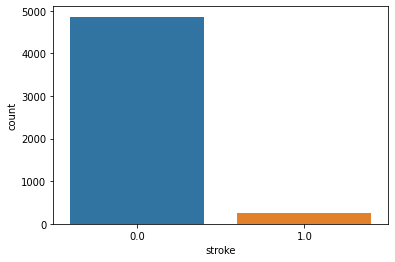

0.0    4860
1.0     249
Name: stroke, dtype: int64

In [91]:
sns.countplot(x= data.stroke)
plt.show()
data.stroke.value_counts()

In [92]:
# data_positive =data.loc[(data.stroke == 1)]
# data = pd.concat([data, data_positive, data_positive, data_positive])

# Split data 

In [93]:
features = ['age', 'age_stroke', 'heart_disease', 'avg_glucose_level', 'ever_married', 'hypertension']
X = data[features]
y = data.stroke

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, random_state=0)
rfc.fit(X_train, y_train)
y_predicted_rfc = rfc.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix

cf_rfc = confusion_matrix(y_test, y_predicted_rfc, labels=[1,0])

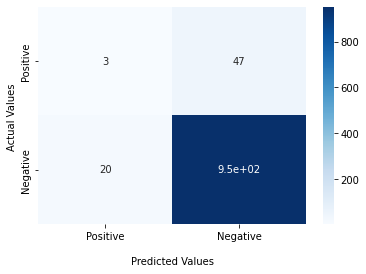

In [97]:
import seaborn as sns

ax = sns.heatmap(cf_rfc, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

plt.show()

In [98]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(rfc, X_train, y_train, cv=5, scoring="accuracy")
scores_precision = cross_val_score(rfc, X_train, y_train, cv=5, scoring="precision")
scores_recall = cross_val_score(rfc, X_train, y_train, cv=5, scoring="recall")
print(f"Accuracy score: {scores_accuracy.mean()}")
print(f"Precision score: {scores_precision.mean()}")
print(f"Recall score: {scores_recall.mean()}")

Accuracy score: 0.9412760023103189
Precision score: 0.19851503759398498
Recall score: 0.07038461538461538


In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted_rfc))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       972
         1.0       0.13      0.06      0.08        50

    accuracy                           0.93      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022



In [100]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(rfc, X_train, y_train, cv=5)

In [101]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

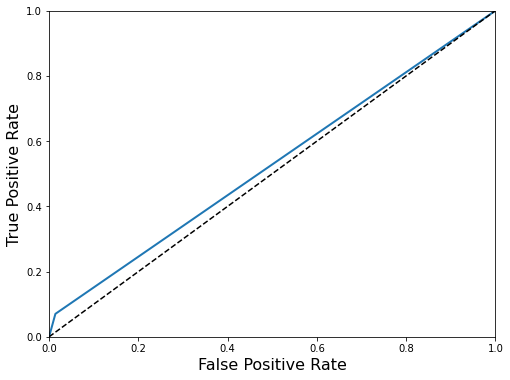

In [102]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [103]:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    return scores.mean(), scores.std()

In [104]:
display_scores(y_scores)

Mean: 0.016882799119158305
Standard deviation: 0.12883233372511907


(0.016882799119158305, 0.12883233372511907)

# XGBoost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_predicted = xgb.predict(X_test)
y_scores = cross_val_predict(xgb, X_train, y_train, cv=5)


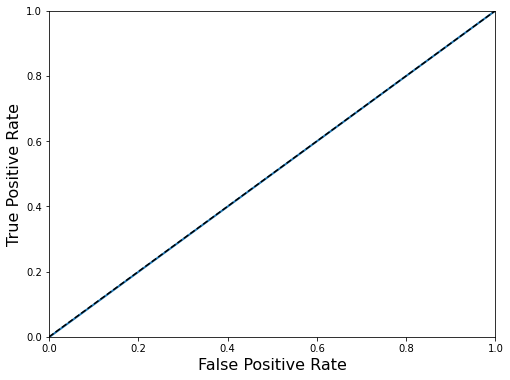

In [73]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
display_scores(y_scores)

Mean: 0.012720156555772993
Standard deviation: 0.11206406280770666


(0.012720156555772993, 0.11206406280770666)

# SVC

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

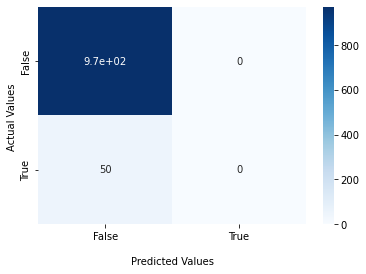

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(X_train_scaler, y_train)
y_predicted = svc.predict(X_test_scaler)
cf_svc = confusion_matrix(y_test, y_predicted)

ax = sns.heatmap(cf_svc, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
y_scores = cross_val_predict(svc, X_train_scaler, y_train, cv=5)

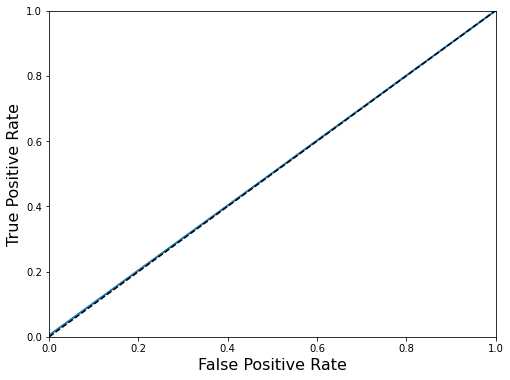

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
display_scores(y_scores)

Mean: 0.0004892367906066536
Standard deviation: 0.02211328645790513


(0.0004892367906066536, 0.02211328645790513)

# Random search

RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(n_jobs=-1, random_state=0)

distributions = dict(n_estimators=[500, 550, 600], max_depth=[15, 20, 23, 30])

rscv_rfc = RandomizedSearchCV(rfc, distributions, random_state=0)

search_rfc = rscv_rfc.fit(X_train, y_train)
search_rfc.best_params_

{'n_estimators': 550, 'max_depth': 15}

In [ ]:
rfc_v2 = RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=550, max_depth=23)
rfc_v2.fit(X_train, y_train)
y_predicted_rfc_v2 = rfc_v2.predict(X_test)
y_scores_v2_rfc = cross_val_predict(rfc_v2, X_train, y_train, cv=5)
rfc_mean, rfc_std = display_scores(y_scores_v2_rfc)

Mean: 0.01908023483365949
Standard deviation: 0.13680708853108411


SVC

In [ ]:
svc = SVC(random_state=0)

distributions = dict(C=[0.1, 0.5, 0.8, 1.0, 1.2, 1.5], kernel=['poly', 'rbf'])

rscv_svc = RandomizedSearchCV(svc, distributions, random_state=0)

search_svc = rscv_svc.fit(X_train_scaler, y_train)
search_svc.best_params_

{'kernel': 'rbf', 'C': 0.1}

In [ ]:
svc_v2 = SVC(random_state=0, kernel='rbf', C=0.1)
svc_v2.fit(X_train_scaler, y_train)
y_predicted_svc_v2 = svc_v2.predict(X_test_scaler)
y_scores_v2_svc = cross_val_predict(svc_v2, X_train_scaler, y_train, cv=5)
svc_mean, svc_std = display_scores(y_scores_v2_svc)

Mean: 0.0
Standard deviation: 0.0


XGBoost

In [ ]:
xgb = XGBClassifier()
distributions = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rscv_xgb =RandomizedSearchCV(xgb, param_distributions=distributions, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
search_xgb = rscv_xgb.fit(X_train, y_train)
search_xgb.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [ ]:
xgb_v2 = XGBClassifier(min_child_weight=5, max_depth=3, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4)
xgb_v2.fit(X_train, y_train)
y_predicted_xgb_v2 = xgb_v2.predict(X_test)
y_scores_v2_xgb = cross_val_predict(xgb_v2, X_train, y_train, cv=5)
xgb_mean, xgb_std = display_scores(y_scores_v2_xgb)

Mean: 0.0002446183953033268
Standard deviation: 0.01563836811000451


# Results

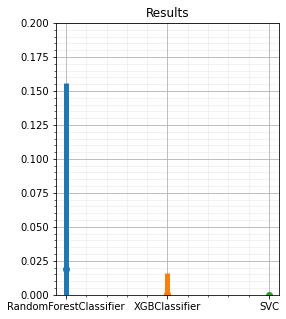

In [ ]:
models = ['RandomForestClassifier', 'XGBClassifier', 'SVC']
mean = [rfc_mean, xgb_mean, svc_mean]
std = [rfc_std, xgb_std, svc_std]

plt.figure(figsize=(4,5))
for i in range(3):
    plt.errorbar(i, mean[i], xerr=0, yerr=std[i], fmt='o', linewidth=5)
plt.xticks([0,1,2], models)
plt.title('Results')
plt.ylim(0, 0.2)
plt.grid(b=True, which='major', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2, linestyle='-')
plt.show()